In [15]:
!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing D:\Program Files\Anaconda\lib\site-packages\fileupload\static -> fileupload
Up to date: C:\Users\arnab\AppData\Roaming\jupyter\nbextensions\fileupload\extension.js
Up to date: C:\Users\arnab\AppData\Roaming\jupyter\nbextensions\fileupload\widget.js
Up to date: C:\Users\arnab\AppData\Roaming\jupyter\nbextensions\fileupload\fileupload\widget.js
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: ok


In [94]:
def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()
    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `text.txt` (5.02 kB)


In [83]:
print(file_contents)

It's not only writers who can benefit from this free online tool. If you're a programmer who's working on a project where blocks of text are needed, this tool can be a great way to get that. It's a good way to test your programming and that the tool being created is working well.

Above are a few examples of how the random paragraph generator can be beneficial. The best way to see if this random paragraph picker will be useful for your intended purposes is to give it a try. Generate a number of paragraphs to see if they are beneficial to your current project.

If you do find this paragraph tool useful, please do us a favor and let us know how you're using it. It's greatly beneficial for us to know the different ways this tool is being used so we can improve it with updates. This is especially true since there are times when the generators we create get used in completely unanticipated ways from when we initially created them. If you have the time, please send us a quick note on what yo

In [106]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER CODE START HERE
    list_of_words = file_contents.split()
    updated_list_of_words = []
    for text in list_of_words:            
        if text.isalpha() == False:
            for indiv_punctuations in punctuations:
                text = text.replace(indiv_punctuations, "")
        lowercase_text = text.lower()
        updated_list_of_words.append(lowercase_text)
    removed_uninteresting_words = []
    for text in updated_list_of_words:
        if text not in uninteresting_words:
            removed_uninteresting_words.append(text)
    new_dict = {}
    for text in removed_uninteresting_words:
        if text not in new_dict:
            new_dict[text] = 1 
        else: 
            new_dict[text] +=1
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(new_dict)
    cloud.to_file("myfile.jpg")
    return cloud.to_array()

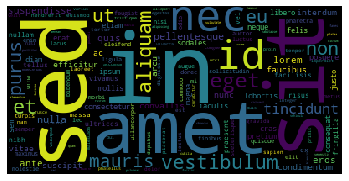

In [107]:
myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()